In [1]:
import copy
import os
import shutil
import sys
sys.path.insert(1, './LIB')
from Utils import *
import math
import numpy as np
import copy

## Setting the paths

In [2]:
trj_path="./STRUCT/C16N2H24SO5_ord.xyz"
skf_folder_path="./PARAM/ORIG/dat/slko/3ob-3-1"

## Loading the reaction coordinate variable

In [3]:
x = np.array([-9.21011, -9.14649, -9.08263, -9.01873, -8.95489, -8.89108, -8.82737, -8.76358, -8.69968, -8.63566, -8.57159, -8.50755, -8.44354, -8.37959, -8.31566, -8.25176, -8.18789, -8.12409, 
              -8.06032, -7.99666, -7.93292, -7.86916, -7.80528, -7.7413, -7.67727, -7.6132, -7.54911, -7.48501, -7.42092, -7.35687, -7.29288, -7.22911, -7.16552, -7.10187, -7.03812, -6.97419, 
              -6.91015, -6.84608, -6.78207, -6.71815, -6.65436, -6.59057, -6.52688, -6.46331, -6.39997, -6.33635, -6.2725, -6.20856, -6.14464, -6.08079, -6.01691, -5.95302, -5.88908, -5.82514, 
              -5.76135, -5.69769, -5.63463, -5.57168, -5.50928, -5.44626, -5.38286, -5.31922, -5.2554, -5.19153, -5.12761, -5.06368, -4.9997, -4.93567, -4.8716, -4.80749, -4.74335, -4.67921, 
              -4.61507, -4.55094, -4.48683, -4.42276, -4.35873, -4.29469, -4.23064, -4.16655, -4.10243, -4.03831, -3.97423, -3.91021, -3.8463, -3.78236, -3.71832, -3.65419, -3.59004, -3.52588, 
              -3.46171, -3.39754, -3.33338, -3.26922, -3.20506, -3.14095, -3.07689, -3.01293, -2.94894, -2.8849, -2.82079, -2.75668, -2.69266, -2.62903, -2.56562, -2.5019, -2.43786, -2.37371, 
              -2.30955, -2.24538, -2.18121, -2.11704, -2.05287, -1.9887, -1.92453, -1.86037, -1.7962, -1.73203, -1.66786, -1.6037, -1.53953, -1.47537, -1.4112, -1.34704, -1.28289, -1.21873, 
              -1.15458, -1.09043, -1.02628, -0.96215, -0.89802, -0.83391, -0.76981, -0.70571, -0.64159, -0.57744, -0.51328, -0.44911, -0.38495, -0.32078, -0.25661, -0.19245, -0.12828, -0.06413, 
              0.00002, 0.06411, 0.12825, 0.19236, 0.25646, 0.32057, 0.38468, 0.44881, 0.51294, 0.57708, 0.64123, 0.70538, 0.76954, 0.8337, 0.89786, 0.96202, 1.02619, 1.09035, 1.15452, 1.21869, 
              1.28286, 1.34702, 1.41116, 1.47517, 1.53879, 1.60212, 1.66575, 1.7298, 1.79395, 1.85811, 1.92227, 1.98644, 2.0506, 2.11477, 2.17894, 2.2431, 2.30727, 2.37143, 2.43559, 2.49974, 
              2.56389, 2.62802, 2.69215, 2.75625, 2.82036, 2.88447, 2.94859, 3.01272, 3.07687, 3.14102, 3.20518, 3.26934, 3.33349, 3.39765, 3.46178, 3.52589, 3.58994, 3.65399, 3.71803, 3.78214, 
              3.84626, 3.91039, 3.97452, 4.03862, 4.10267, 4.16669, 4.23067, 4.29469, 4.35872, 4.42279, 4.48685, 4.55091, 4.61497, 4.67903, 4.74304, 4.80697, 4.87079, 4.93475, 4.99878, 5.06289, 
              5.12703, 5.19116, 5.25527, 5.31927, 5.38314, 5.44686, 5.51055, 5.57434, 5.6382, 5.70221, 5.76628, 5.83039, 5.89452, 5.95865, 6.02278, 6.08691, 6.15104, 6.21516, 6.27927, 6.34337, 
              6.40747, 6.47155, 6.53563, 6.59969, 6.66376, 6.72782, 6.79189, 6.85595, 6.92001, 6.98406, 7.04811, 7.11216, 7.17622, 7.2403, 7.30438, 7.36849, 7.43259, 7.49671, 7.56082, 7.62492, 
              7.68901, 7.75308, 7.81716, 7.88124, 7.94533, 8.00945, 8.07357, 8.1377, 8.20183, 8.26595, 8.33007, 8.39417, 8.45826, 8.52232, 8.58638, 8.65043, 8.71449, 8.77857, 8.84266, 8.90675, 
              8.97082, 9.03485, 9.09884, 9.16279, 9.22674, 9.2907, 9.35468, 9.41868, 9.48271, 9.54675, 9.6108, 9.67485, 9.73888, 9.80288, 9.86682, 9.9307])

## Analyzing the Repulsive Potentials (RPs) for C-H 

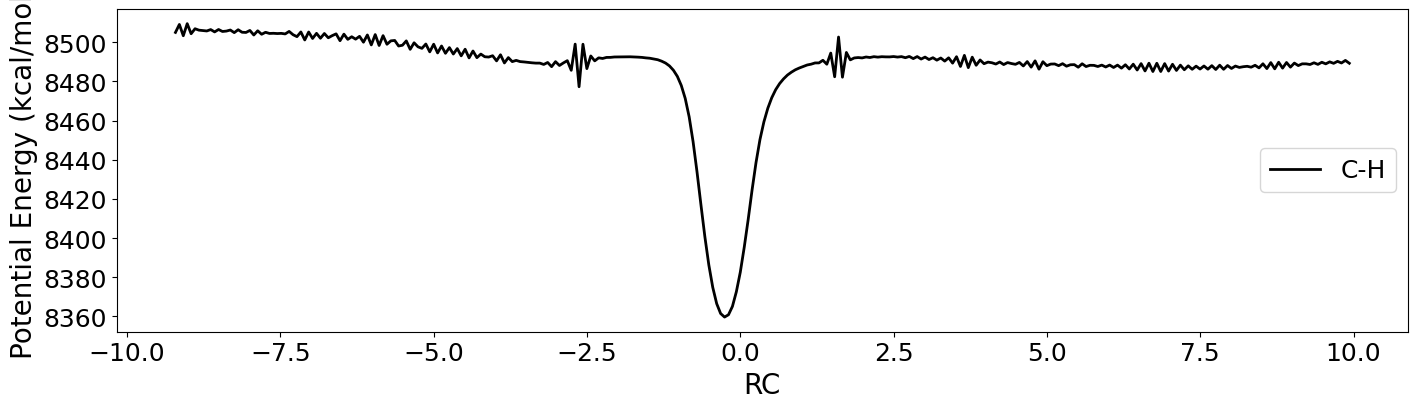

In [4]:
#%matplotlib notebook
import matplotlib.pyplot as plt
#plt.ion()
#Reading the trajectory and loading the parameters from "C-H.skf"
traj=XYZHandler(trj_path)
data_ch=skf_folder_path + "/C-H.skf"
pCH = DFTBParam(ener='KCal')
pCH.read_params(data_ch)
rp_ch=[]
for i in range(1,len(traj.frames)):
    rp_ch.append(pCH.compute_full_potential(traj.get_distribution(elem1='C',elem2='H',frame=i)))
rp_ch=np.array(rp_ch)    

plt.figure(figsize=(14, 4.1))
font = {'color':  'black',
        'weight': 'normal',
        'size': 18}
#plt.title("DFTB3's Repulsive Potentials", fontdict=font)
plt.plot(x, rp_ch, label="C-H", linestyle='solid', color='black', linewidth=2, marker='', markerfacecolor='blue', markersize=6)
plt.xlabel('RC', fontsize=20)
plt.ylabel('Potential Energy (kcal/mol)', fontsize=20)
#plt.grid()
plt.tight_layout()
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=18,loc='center right')
#plt.minorticks_on()
#plt.savefig('RepulsivePotential_CH_vs_RC.png', dpi=1200, transparent=True,bbox_inches="tight")
plt.show()

 ## Analyzing the RPs for C-C

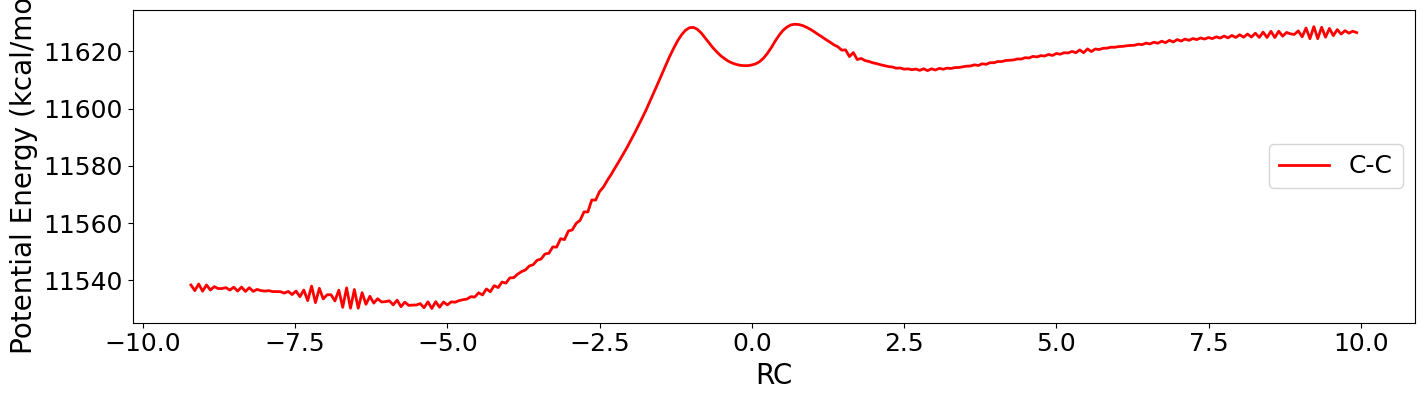

In [5]:
#%matplotlib notebook
import matplotlib.pyplot as plt1
#plt1.ion()
#Reading the trajectory and loading the parameters from "C-C.skf"
traj=XYZHandler(trj_path)
data_cc=skf_folder_path + "/C-C.skf"
pCC = DFTBParam(ener='KCal')
pCC.read_params(data_cc)
rp_cc=[]
for i in range(1,len(traj.frames)):
    rp_cc.append(pCC.compute_full_potential(traj.get_distribution(elem1='C',elem2='C',frame=i)))
rp_cc=np.array(rp_cc)    

plt1.figure(figsize=(14, 4.0))
font = {'color':  'black',
        'weight': 'normal',
        'size': 18}
#plt1.title("DFTB3's C-C Repulsive Potential for the IRC's geometries at the DFT level of theory", fontdict=font)
plt1.plot(x, rp_cc, label="C-C", linestyle='solid', linewidth=2, marker='', color='red', markerfacecolor='blue', markersize=6)
plt1.xlabel('RC', fontsize=20)
plt1.ylabel('Potential Energy (kcal/mol)', fontsize=20)
#plt1.grid()
plt1.tight_layout()
#plt1.minorticks_on()
plt1.yticks(fontsize=18)
plt1.xticks(fontsize=18)
plt1.legend(fontsize=18,loc=7)
#plt1.savefig('RepulsivePotential_CC_vs_RC.png', dpi=1200, transparent=True,bbox_inches="tight")
plt1.show()

## Plotting the sum of the RPs for CH and CC

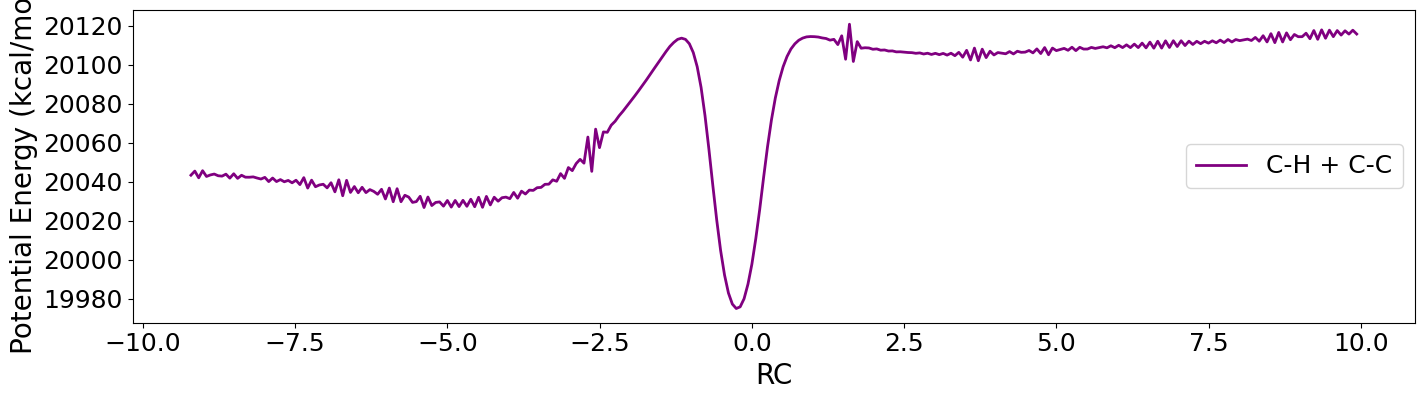

In [6]:
#%matplotlib notebook
import matplotlib.pyplot as plt2
#plt2.ion()

plt2.figure(figsize=(14, 4))
font = {'color':  'black',
        'weight': 'normal',
        'size': 18}
#plt2.title("Sumed DFTB3's C-C and C-H Repulsive Potentials for the IRC's geometries at the DFT level of theory", fontdict=font)
plt2.plot(x, rp_ch+rp_cc, label="C-H + C-C", linestyle='solid', color='purple', linewidth=2, marker='', markerfacecolor='blue', markersize=6)
plt2.xlabel('RC', fontsize=20)
plt2.ylabel('Potential Energy (kcal/mol)', fontsize=20)
#plt2.grid()
plt2.tight_layout()
#plt2.minorticks_on()
plt2.yticks(fontsize=18)
plt2.xticks(fontsize=18)
plt2.legend(fontsize=18,loc='center right')
#plt2.savefig('RepulsivePotential_CH+CC_vs_RC.png', dpi=1200, transparent=True,bbox_inches="tight")
plt2.show()

# Analyzing the distance distributions for DFT's stationary points 

## For C-C

In [7]:
t1_cc=np.array(traj.get_distribution(elem1='C',elem2='C',frame=1))
t2_cc=np.array(traj.get_distribution(elem1='C',elem2='C',frame=299))
m_cc=np.array(traj.get_distribution(elem1='C',elem2='C',frame=145))

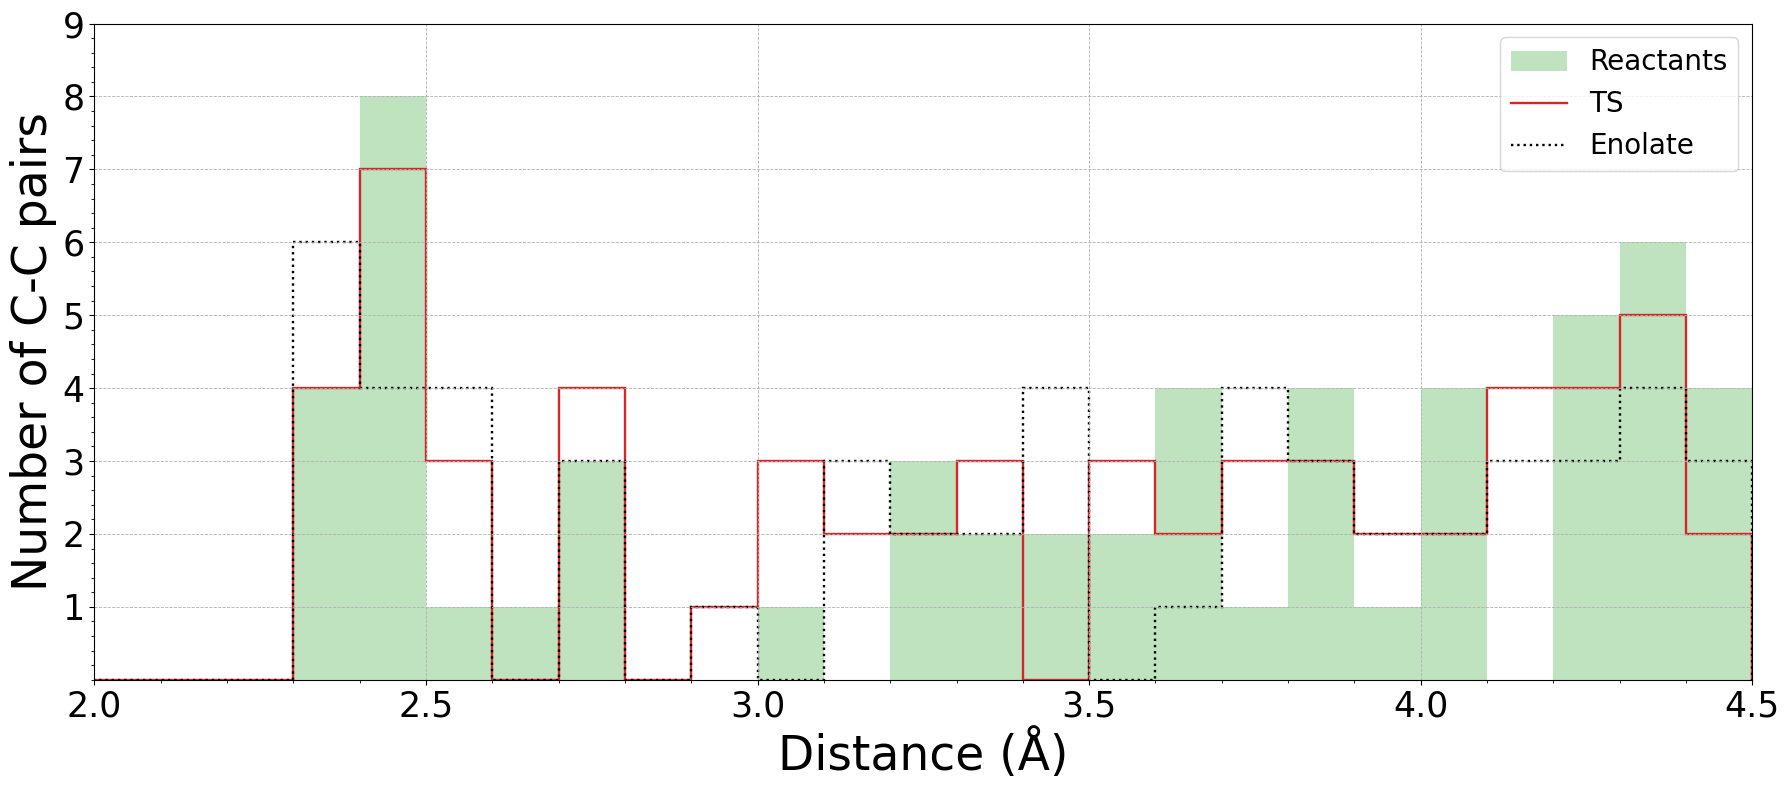

In [8]:
cc_react_hist,cc_react_bin_edges=np.histogram(t1_cc[np.where(t1_cc<=4.5)],bins=35, range=(1.3,4.8))
cc_ts_hist,cc_ts_bin_edges=np.histogram(m_cc[np.where(m_cc<=4.5)],bins=35, range=(1.3,4.8))
cc_prod_hist,cc_prod_bin_edges=np.histogram(t2_cc[np.where(t2_cc<=4.5)],bins=35, range=(1.3,4.8))

plt.figure(figsize=[18,8])
plt.stairs(cc_react_hist,cc_react_bin_edges,color='tab:green',fill=True,alpha=0.3,label='Reactants')
plt.stairs(cc_ts_hist,cc_ts_bin_edges,color='tab:red',alpha=1,label='TS',linestyle='solid', linewidth=1.7)
plt.stairs(cc_prod_hist,cc_prod_bin_edges,color='black',alpha=1,label='Enolate',linestyle='dotted', linewidth=1.7,)
plt.legend(fontsize=20,loc='upper right')
plt.xlabel('Distance (Å)',fontsize=34)
plt.ylabel('Number of C-C pairs',fontsize=34)
xticks=[2.0,2.5,3.0,3.5,4.0,4.5]
yticks=[0,1,2,3,4,5,6,7,8,9]
plt.xticks(ticks=xticks,labels=xticks, fontsize=25)
plt.yticks(ticks=yticks[1:],labels=yticks[1:], fontsize=25)
plt.ylim(top=9)
plt.xlim(left=2.0, right=4.5)
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.6)
plt.tight_layout()
#plt.savefig('Distrib_CC_REACT-TS-PROD.png', dpi=1200, transparent=True)
plt.show()

## For C-H

In [9]:
t1_ch=np.array(traj.get_distribution(elem1='C',elem2='H',frame=1))
t2_ch=np.array(traj.get_distribution(elem1='C',elem2='H',frame=299))
m_ch=np.array(traj.get_distribution(elem1='C',elem2='H',frame=145))

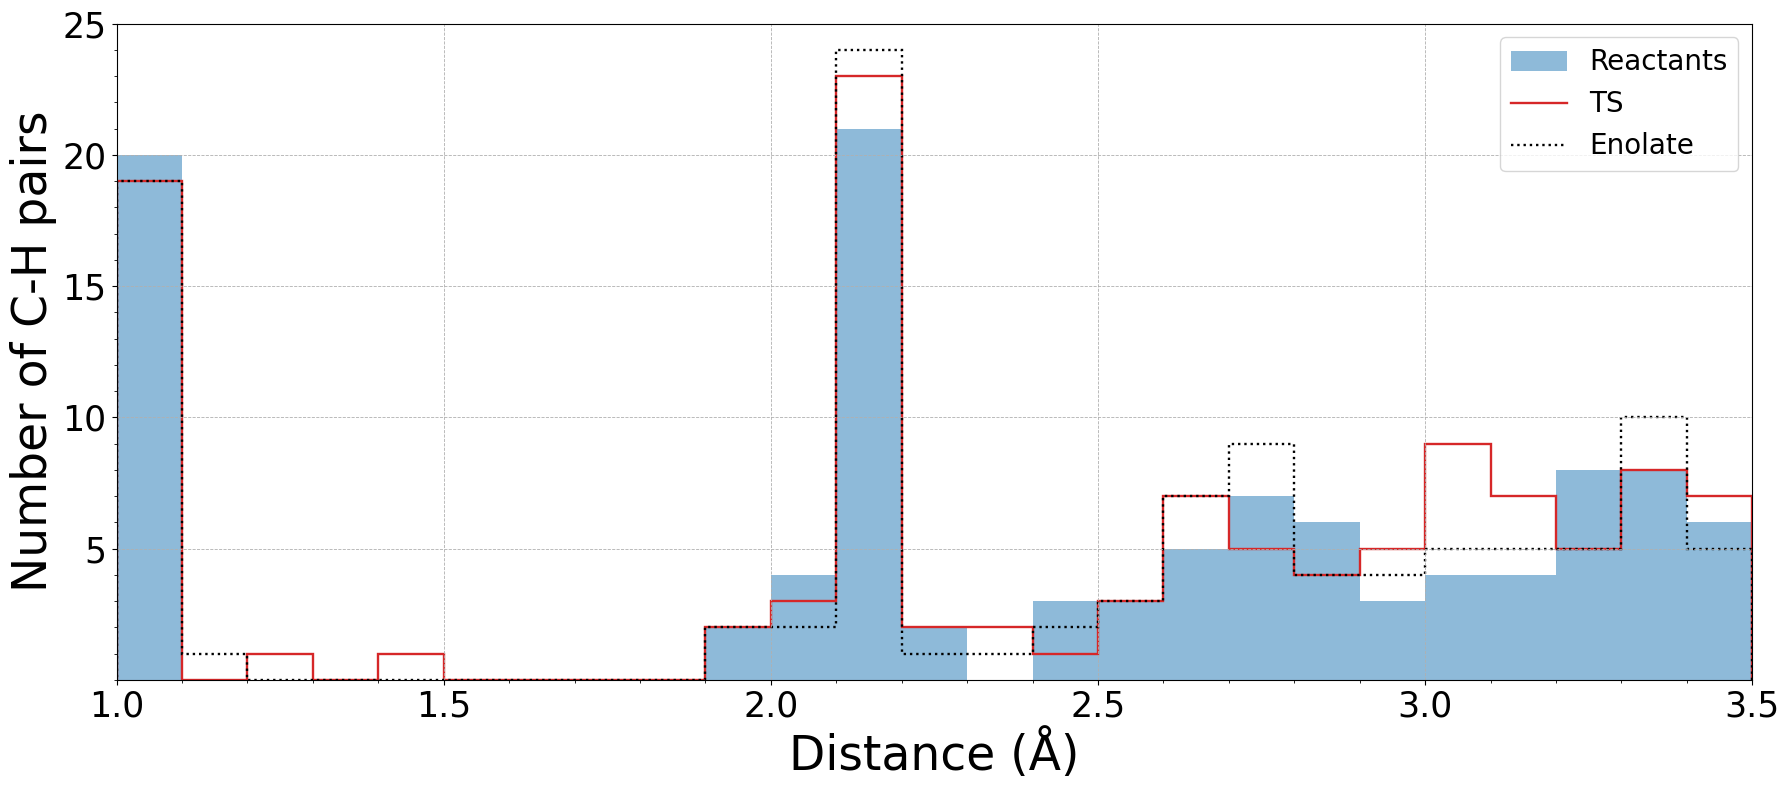

In [10]:
ch_react_hist,ch_react_bin_edges=np.histogram(t1_ch[np.where(t1_ch<3.5)],bins=26, range=(0.9,3.5))
ch_ts_hist,ch_ts_bin_edges=np.histogram(m_ch[np.where(m_ch<3.5)],bins=26, range=(0.9,3.5))
ch_prod_hist,ch_prod_bin_edges=np.histogram(t2_ch[np.where(t2_ch<3.5)],bins=26, range=(0.9,3.5))

plt.figure(figsize=[18,8])
plt.stairs(ch_react_hist,ch_react_bin_edges,color='tab:blue',fill=True,alpha=0.5,label='Reactants')
plt.stairs(ch_ts_hist,ch_ts_bin_edges,color='tab:red',alpha=1,label='TS',linestyle='solid', linewidth=1.7)
plt.stairs(ch_prod_hist,ch_prod_bin_edges,color='black',alpha=1,label='Enolate',linestyle='dotted', linewidth=1.7,)
plt.legend(fontsize=20,loc='upper right')
plt.xlabel('Distance (Å)',fontsize=34)
plt.ylabel('Number of C-H pairs',fontsize=34)
xticks=[1.0,1.5,2.0,2.5,3.0,3.5]
yticks=[0,5,10,15,20,25]
plt.xticks(ticks=xticks,labels=xticks, fontsize=25)
plt.yticks(ticks=yticks[1:],labels=yticks[1:], fontsize=25)
plt.ylim(top=25)
plt.xlim(left=1.0, right=3.5)
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.6)
plt.tight_layout()
#plt.savefig('Distrib_CH_REACT-TS-PROD.png', dpi=1200, transparent=True)
plt.show()

### C-H Repulsive Potential function

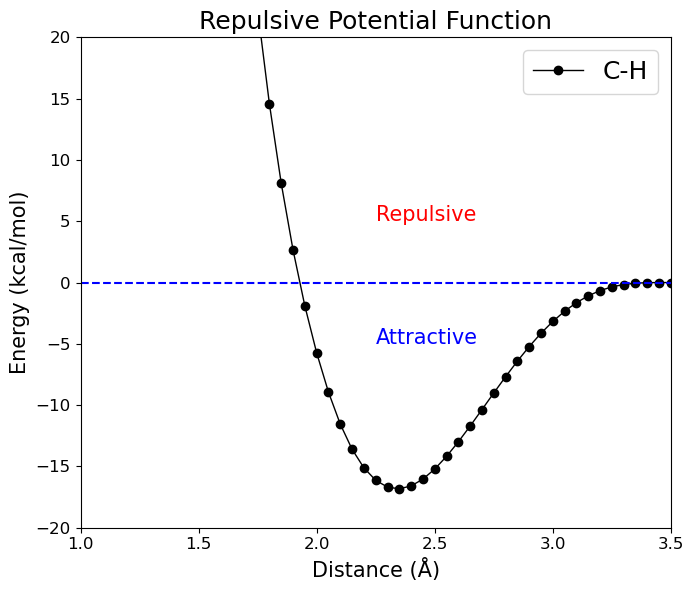

In [15]:
skf_path="./PARAM/ORIG/dat/slko/3ob-3-1/C-H.skf"
orig_param = DFTBParam(ener='KCal')
orig_param.read_params(skf_path)
xlimits=[1.0,3.5]
ylimits=[-20,20]
import matplotlib.pyplot as plt5
#plt5.ion()
fig, ax = plt5.subplots(figsize=(7, 6))
ax.set_title("Repulsive Potential Function", fontsize=18)
ax.set_xlabel('Distance (Å)', fontsize=15)
ax.set_ylabel('Energy (kcal/mol)', fontsize=15)
plt5.plot(orig_param.x, orig_param.y, label="C-H", linestyle='solid', linewidth=1, color='black', marker='o', markerfacecolor='black', markersize=6)
#plt5.grid()
plt5.tight_layout()
#plt5.minorticks_on()
plt5.xlim(xlimits[0], xlimits[1])
plt5.ylim(ylimits[0], ylimits[1])
plt5.yticks(fontsize=12)
plt5.xticks(fontsize=12)
plt5.axhline(y=0.0, color='blue', linestyle='--')
plt5.text(2.25,-5,'Attractive', color='blue',fontsize=15)
plt5.text(2.25,5,'Repulsive', color='red',fontsize=15)
f=ax.legend(fontsize=18,labelcolor='black')
f._legend_title_box._text.set_color('black')
#plt5.savefig('RP_function_CH.png', dpi=1200, transparent=True)
plt5.show()

### C-C Repulsive Potential function

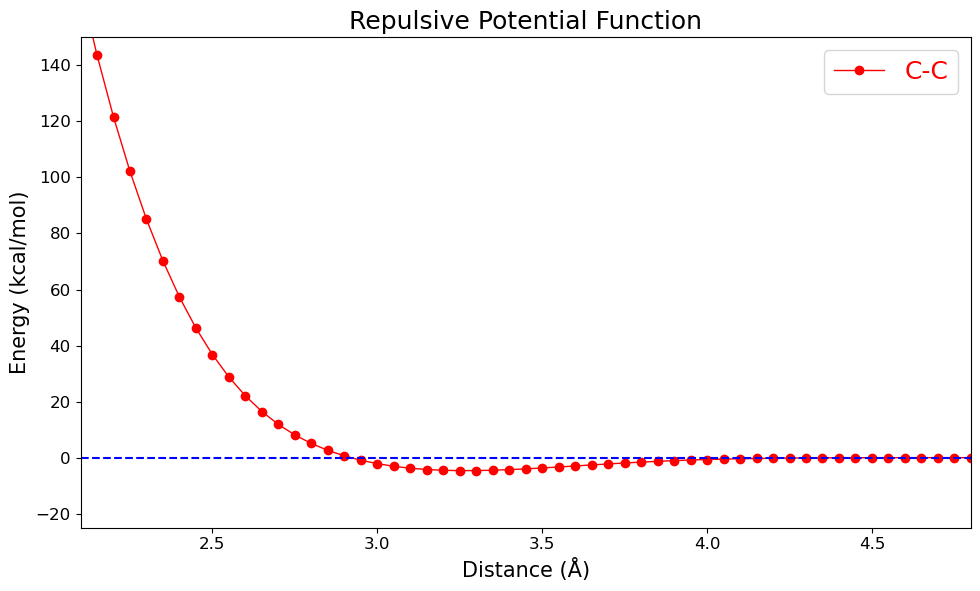

In [16]:
skf_path="PARAM/ORIG/dat/slko/3ob-3-1/C-C.skf"
orig_param = DFTBParam(ener='KCal')
orig_param.read_params(skf_path)
xlimits=[2.1,4.8]
ylimits=[-25,150]
import matplotlib.pyplot as plt6
plt6.ion()
fig, ax = plt6.subplots(figsize=(10, 6))
ax.set_title("Repulsive Potential Function", fontsize=18)
ax.set_xlabel('Distance (Å)', fontsize=15)
ax.set_ylabel('Energy (kcal/mol)', fontsize=15)
plt6.plot(orig_param.x, orig_param.y, label="C-C", linestyle='solid', linewidth=1, color='red', marker='o', markerfacecolor='red', markersize=6)
#plt6.grid()
plt6.tight_layout()
#plt6.minorticks_on()
plt6.xlim(xlimits[0], xlimits[1])
plt6.ylim(ylimits[0], ylimits[1])
plt6.yticks(fontsize=12)
plt6.xticks(fontsize=12)
plt6.axhline(y=0.0, color='blue', linestyle='--')
#plt6.text(2.35,-15,'Attractive', color='blue',fontsize=15)
#plt6.text(2.35,5,'Repulsive', color='red',fontsize=15)
f=ax.legend(fontsize=18,labelcolor='red')
f._legend_title_box._text.set_color('red')
#plt6.savefig('RP_function_CC.png', dpi=1200, transparent=True)
plt6.show()

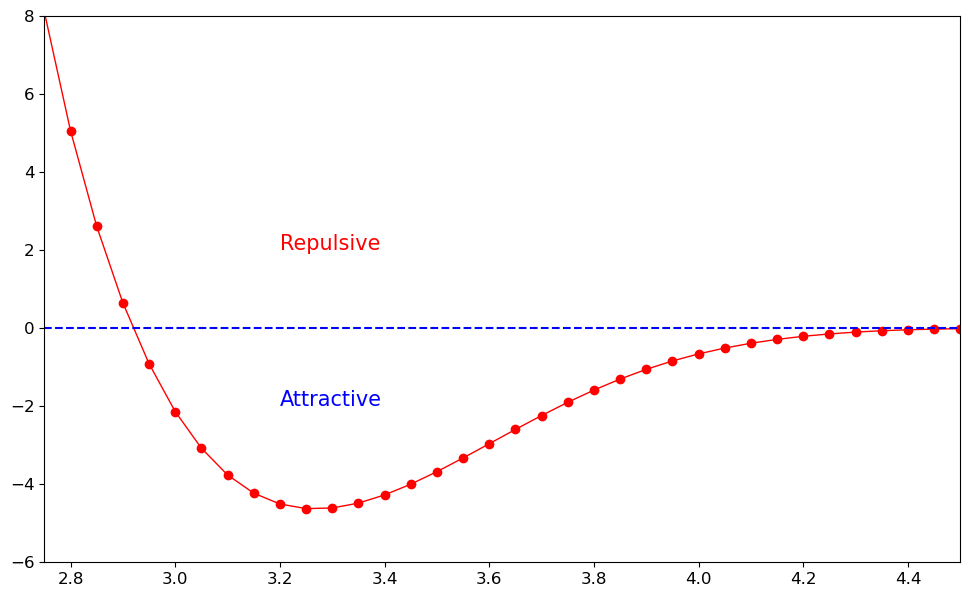

In [19]:
skf_path="PARAM/ORIG/dat/slko/3ob-3-1/C-C.skf"
orig_param = DFTBParam(ener='KCal')
orig_param.read_params(skf_path)
xlimits=[2.75,4.5]
ylimits=[-6,8]
import matplotlib.pyplot as plt7
plt7.ion()
fig, ax = plt7.subplots(figsize=(10, 6))
#ax.set_title("Repulsive Potential Function", fontsize=18)
#ax.set_xlabel('Distance (Å)', fontsize=15)
#ax.set_ylabel('Energy (kcal/mol)', fontsize=15)
plt7.plot(orig_param.x, orig_param.y, label="C-C", linestyle='solid', linewidth=1, color='red', marker='o', markerfacecolor='red', markersize=6)
#plt7.grid()
plt7.tight_layout()
#plt7.minorticks_on()
plt7.xlim(xlimits[0], xlimits[1])
plt7.ylim(ylimits[0], ylimits[1])
plt7.yticks(fontsize=12)
plt7.xticks(fontsize=12)
plt7.axhline(y=0.0, color='blue', linestyle='--')
plt7.text(3.2,-2.0,'Attractive', color='blue',fontsize=15)
plt7.text(3.2,2.0,'Repulsive', color='red',fontsize=15)
#f=ax.legend(fontsize=18,labelcolor='red')
#f._legend_title_box._text.set_color('red')
#plt7.savefig('RP_function_CC_zoom.png', dpi=1200, transparent=True)
plt7.show()

# Modifying the RP functions

## RP for C-C

In [ ]:
orig_skf_path="PARAM/ORIG/dat/slko/3ob-3-1/C-C.skf"
p1=ParamHandler(orig_param_file=orig_skf_path, traj_file=trj_path)
p1.reset_mod_params()
i=3.0
p1.sum_bounded_harmonic(x1=2.25, x2=2.65, set_curve=True, top_val=-float(3*i), index=18)
p1.sum_bounded_harmonic(x1=2.30, x2=2.6, set_curve=False, top_val=float(1.8*i), index=18)
p1.sum_bounded_harmonic(x1=2.65, x2=3.4, set_curve=False, top_val=float(3*i), index=18)
p1.sum_bounded_harmonic(x1=2.7, x2=3.35, set_curve=False, top_val=-float(2.9*i), index=18)

In [ ]:
skf_path="PARAM/ORIG/dat/slko/3ob-3-1/C-C.skf"
orig_param = DFTBParam(ener='KCal')
orig_param.read_params(skf_path)
xlimits=[2.25,4.3]
ylimits=[-25,110]
import matplotlib.pyplot as plt8
%matplotlib notebook
plt8.ion()
fig, ax = plt8.subplots(figsize=(8, 6))
ax.set_title("Repulsive Potential Function", fontsize=18)
ax.set_xlabel('Distance (Å)', fontsize=15)
ax.set_ylabel('Energy (kcal/mol)', fontsize=15)
plt8.plot(orig_param.x, orig_param.y, label="Original C-C", linestyle='solid', linewidth=1, color='red', marker='o', markerfacecolor='red', markersize=6)
plt8.plot(p1.mod_param.x, p1.mod_param.mod_y, label="Modified C-C", linestyle='solid', linewidth=1, color='blue', marker='o', markerfacecolor='blue', markersize=6)
#plt8.grid()
plt8.tight_layout()
#plt8.minorticks_on()
plt8.xlim(xlimits[0], xlimits[1])
plt8.ylim(ylimits[0], ylimits[1])
plt8.yticks(fontsize=12)
plt8.xticks(fontsize=12)
plt8.axhline(y=0.0, color='blue', linestyle='--')
#plt8.text(2.35,-15,'Attractive', color='blue',fontsize=15)
#plt8.text(2.35,5,'Repulsive', color='red',fontsize=15)
f=ax.legend(fontsize=18)
f._legend_title_box._text.set_color('red')
#plt8.savefig('RP_function_CC_modif.png', dpi=1200, transparent=True)
plt8.show()

## RP for C-H

In [ ]:
orig_skf_path="PARAM/ORIG/dat/slko/3ob-3-1/C-H.skf"
p2=ParamHandler(orig_param_file=orig_skf_path, traj_file=trj_path)
p2.reset_mod_params()
i=4.0
p2.sum_bounded_harmonic(x1=1.8, x2=3.5, set_curve=True, top_val=float(3*i), index=18)
p2.sum_bounded_harmonic(x1=1.95, x2=3.45, set_curve=False, top_val=-float(2*i), index=18)
p2.sum_bounded_harmonic(x1=1.85, x2=3.0, set_curve=False, top_val=float(3*i), index=18)
p2.sum_bounded_harmonic(x1=2.0, x2=2.95, set_curve=False, top_val=-float(2*i), index=18)

In [ ]:
skf_path="PARAM/ORIG/dat/slko/3ob-3-1/C-H.skf"
orig_param = DFTBParam(ener='KCal')
orig_param.read_params(skf_path)
xlimits=[1.75,3.5]
ylimits=[-20,20]
import matplotlib.pyplot as plt9
%matplotlib notebook
plt9.ion()
fig, ax = plt9.subplots(figsize=(8, 6))
ax.set_title("Repulsive Potential Function", fontsize=18)
ax.set_xlabel('Distance (Å)', fontsize=15)
ax.set_ylabel('Energy (kcal/mol)', fontsize=15)
plt9.plot(orig_param.x, orig_param.y, label="Original C-H", linestyle='solid', linewidth=1, color='black', marker='o', markerfacecolor='black', markersize=6)
plt8.plot(p2.mod_param.x, p2.mod_param.mod_y, label="Modified C-H", linestyle='solid', linewidth=1, color='blue', marker='o', markerfacecolor='blue', markersize=6)
#plt9.grid()
plt9.tight_layout()
#plt9.minorticks_on()
plt9.xlim(xlimits[0], xlimits[1])
plt9.ylim(ylimits[0], ylimits[1])
plt9.yticks(fontsize=12)
plt9.xticks(fontsize=12)
plt9.axhline(y=0.0, color='blue', linestyle='--')
#plt9.text(2.25,-5,'Attractive', color='blue',fontsize=15)
#plt9.text(2.25,5,'Repulsive', color='red',fontsize=15)
f=ax.legend(fontsize=18)
f._legend_title_box._text.set_color('black')
plt9.savefig('RP_function_CH_modif.png', dpi=1200, transparent=True)
plt9.show()

# Plot the IRC profile's fitting

In [ ]:
y_dftb_mod=np.array([-37638.90317573,-37639.17967596,-37639.05755501,-37638.98170210,-37638.67428508,-37638.76938431,-37638.63815384,-37638.66829649,-37638.49739198,-37638.73464504,
                     -37638.58694706,-37638.49689859,-37638.45987039,-37638.27532716,-37638.01740274,-37638.20195032,-37638.02822456,-37638.07150339,-37637.78302032,-37637.78321181,
                     -37637.24988997,-37637.08327576,-37637.20033379,-37636.92720490,-37636.84653725,-37636.69952586,-37636.31613875,-37636.32000587,-37636.05310490,-37635.80576633,
                     -37635.41606786,-37635.23300849,-37635.02260938,-37634.83726986,-37634.65827348,-37633.71379344,-37633.20915862,-37632.56714399,-37631.84336343,-37630.83640339,
                     -37629.36555088,-37627.81884957,-37626.24528059,-37624.36371066,-37622.25485686,-37619.57193063,-37618.10721365,-37617.07660162,-37616.42840473,-37616.79808886,
                     -37617.43467425,-37617.86737952,-37618.44859013,-37619.17611279,-37620.08180662,-37620.82569983,-37621.40725562,-37622.34662875,-37622.85412038,-37623.21382208,
                     -37623.47352131,-37623.80238906,-37624.12541495,-37624.40706305,-37624.70226816,-37624.75575088,-37624.68725122,-37624.99783575,-37624.90125677,-37625.34455381,
                     -37625.05392808,-37625.16146277,-37625.12114810,-37625.42976801,-37625.17373164,-37625.18191344,-37625.40958036,-37625.46998352,-37625.39554883,-37625.42262654,
                     -37625.35593278,-37625.11796399,-37625.06835043,-37625.08141641,-37625.13666021,-37625.05917011,-37625.24088595,-37625.09545648,-37625.19476216,-37624.91745843,
                     -37625.11078789,-37624.98094827,-37624.81725640,-37625.17690954,-37624.83585600,-37624.86796489,-37625.09654178,-37624.98518826,-37624.95561589,-37624.99271016])
y_dftb_mod=y_dftb_mod-np.min(y_dftb_mod)
y_dft = np.array([0.0,0.0168,0.0369,0.06126,0.09125,0.12602,0.16571,0.2085,0.25654,0.30957,0.36909,0.4302,0.49548,0.56931,0.64758,0.72643,0.81547,0.91198,1.021,
                  1.15674,1.27559,1.42542,1.58983,1.77057,1.96948,2.1899,2.43142,2.70312,3.00706,3.34357,3.72412,4.15019,4.63093,5.16423,5.7851,6.45505,7.22844,
                  8.09619,9.05818,10.11931,11.29174,12.60299,14.10541,15.88199,18.06321,20.76763,23.29271,24.81067,25.31752,24.94048,24.24781,23.60706,23.04356,
                  22.53833,22.07837,21.65472,21.26847,20.89778,20.5484,20.22006,19.9099,19.61723,19.34192,19.08346,18.84094,18.61491,18.40541,18.21223,18.03287,
                  17.86753,17.71647,17.57444,17.44324,17.32183,17.20731,17.09794,16.99701,16.901,16.8069,16.71761,16.63238,16.55068,16.47214,16.39663,16.32376,
                  16.25357,16.18569,16.12003,16.05668,15.99539,15.9357,15.87805,15.82241,15.76869,15.71641,15.66591,15.61717,15.56944,15.52328,15.479])
y_dftb = np.array([0.0,0.0629313999961596,0.11697400999400998,0.1847027099938714,0.3076601499997196,0.24528682999516604,0.3590820999961579,0.36195917999430094,0.4893085399962729,0.4763074999937089,
                   0.6120030199963367,0.725685909994354,0.7545161799935158,0.7725700800001505,0.9778213999961736,0.9883817199952318,1.1627562099965871,1.2167839600006118,1.4123662099955254,
                   1.5549310599963064,1.7538442099976237,1.9656749899950228,2.099301709997235,2.227515709993895,2.422247909998987,2.589213519997429,2.841757919995871,3.009616379997169,
                   3.2511471999969217,3.4675381399938487,3.7503572999994503,4.023145799998019,4.246686479993514,4.639024329997483,5.089914839998528,5.489420159996371,6.024299009994138,
                   6.639478309996775,7.348350569998729,8.22996117999719,9.043185769995034,9.85877428999811,10.553482489995076,11.011434909996751,10.903935689995706,10.540232449995528,
                   10.649029259999224,11.353236529997957,12.27064129000064,13.516032559993619,14.463414719997672,14.970182159995602,15.147226399996725,15.025829129997874,14.651096639994648,
                   14.350293399998918,13.90738078999857,13.569496479998634,13.20916269999725,12.947718269999314,12.75152844999684,12.52187209999829,12.447895220000646,12.227578419995552,
                   12.137557570000354,12.027675220000674,11.936803639997379,11.898920089995954,11.816533089993754,11.795476409999537,11.866254649998154,11.780145489996357,11.826336399994034,
                   11.80075358999602,11.833352359994024,11.865399219997926,11.927898409994668,11.830980009995983,11.956470839999383,11.998836569997366,11.995289669997874,12.010483309997653,
                   12.097352769997087,12.098122469993541,12.215690439996251,12.237727829997311,12.234767299996747,12.24536915999488,12.28123757999856,12.348236729994824,12.401890789995377,
                   12.482650629994168,12.506262459995924,12.551955759998236,12.547910779998347,12.590867560000333,12.69206132999534,12.748217319996911,12.775065859997994,12.730710289994022])

x = np.array([-9.21011,-9.14649,-9.08263,-9.01873,-8.95489,-8.89108,-8.82737,-8.76358,-8.69968,-8.63566,-8.57159,-8.50755,-8.44354,-8.37959,-8.31566,-8.25176,-8.18789,-8.12409,-8.06032,
              -7.99666,-7.93292,-7.86916,-7.80528,-7.7413,-7.67727,-7.6132,-7.54911,-7.48501,-7.42092,-7.35687,-7.29288,-7.22911,-7.16552,-7.10187,-7.03812,-6.97419,-6.91015,-6.84608,-6.78207,
              -6.71815,-6.65436,-6.59057,-6.52688,-6.46331,-6.39997,-6.33635,-6.2725,-6.20856,-6.14464,-6.08079,-6.01691,-5.95302,-5.88908,-5.82514,-5.76135,-5.69769,-5.63463,-5.57168,-5.50928,
              -5.44626,-5.38286,-5.31922,-5.2554,-5.19153,-5.12761,-5.06368,-4.9997,-4.93567,-4.8716,-4.80749,-4.74335,-4.67921,-4.61507,-4.55094,-4.48683,-4.42276,-4.35873,-4.29469,-4.23064,
              -4.16655,-4.10243,-4.03831,-3.97423,-3.91021,-3.8463,-3.78236,-3.71832,-3.65419,-3.59004,-3.52588,-3.46171,-3.39754,-3.33338,-3.26922,-3.20506,-3.14095,-3.07689,-3.01293,-2.94894,
              -2.8849,-2.82079,-2.75668,-2.69266,-2.62903,-2.56562,-2.5019,-2.43786,-2.37371,-2.30955,-2.24538,-2.18121,-2.11704,-2.05287,-1.9887,-1.92453,-1.86037,-1.7962,-1.73203,-1.66786,
              -1.6037,-1.53953,-1.47537,-1.4112,-1.34704,-1.28289,-1.21873,-1.15458,-1.09043,-1.02628,-0.96215,-0.89802,-0.83391,-0.76981,-0.70571,-0.64159,-0.57744,-0.51328,-0.44911,-0.38495,
              -0.32078,-0.25661,-0.19245,-0.12828,-0.06413,0.00002,0.06411,0.12825,0.19236,0.25646,0.32057,0.38468,0.44881,0.51294,0.57708,0.64123,0.70538,0.76954,0.8337,0.89786,0.96202,1.02619,
              1.09035,1.15452,1.21869,1.28286,1.34702,1.41116,1.47517,1.53879,1.60212,1.66575,1.7298,1.79395,1.85811,1.92227,1.98644,2.0506,2.11477,2.17894,2.2431,2.30727,2.37143,2.43559,2.49974,
              2.56389,2.62802,2.69215,2.75625,2.82036,2.88447,2.94859,3.01272,3.07687,3.14102,3.20518,3.26934,3.33349,3.39765,3.46178,3.52589,3.58994,3.65399,3.71803,3.78214,3.84626,3.91039,3.97452,
              4.03862,4.10267,4.16669,4.23067,4.29469,4.35872,4.42279,4.48685,4.55091,4.61497,4.67903,4.74304,4.80697,4.87079,4.93475,4.99878,5.06289,5.12703,5.19116,5.25527,5.31927,5.38314,5.44686,
              5.51055,5.57434,5.6382,5.70221,5.76628,5.83039,5.89452,5.95865,6.02278,6.08691,6.15104,6.21516,6.27927,6.34337,6.40747,6.47155,6.53563,6.59969,6.66376,6.72782,6.79189,6.85595,6.92001,
              6.98406,7.04811,7.11216,7.17622,7.2403,7.30438,7.36849,7.43259,7.49671,7.56082,7.62492,7.68901,7.75308,7.81716,7.88124,7.94533,8.00945,8.07357,8.1377,8.20183,8.26595,8.33007,8.39417,
              8.45826,8.52232,8.58638,8.65043,8.71449,8.77857,8.84266,8.90675,8.97082,9.03485,9.09884,9.16279,9.22674,9.2907,9.35468,9.41868,9.48271,9.54675,9.6108,9.67485,9.73888,9.80288,9.86682,
              9.9307])



In [ ]:
import numpy as np
import matplotlib.pyplot as plt10
#plt10.ion()
plt10.figure(figsize=(14, 5))
font = {'color':  'black',
        'weight': 'normal',
        'size': 18}
plt10.title("DFTB3 single-point calculations on IRC profile's DFT geometries", fontdict=font)
plt10.plot(x[0::3], y_dft, label="E(M062X/def2-TZVP)", linestyle='solid', linewidth=2, marker='', markersize=3.0)
plt10.plot(x[0::3], y_dftb, label="E(DFTB3)", linestyle='solid', linewidth=2, marker='', markersize=3.0)
plt10.plot(x[0::3], y_dftb_mod, label="E(DFTB3_CC_CH)", linestyle='solid', linewidth=2, marker='', markersize=3.0)
#plt.xlim(1.0, 3.0)
#plt.ylim(-0.5, 6)
plt10.xlabel('RC', fontsize=15)
plt10.ylabel('Potential Energy (kcal/mol)', fontsize=15)
#plt10.grid()
plt10.tight_layout()
#plt10.minorticks_on()
plt10.yticks(fontsize=12)
plt10.xticks(fontsize=12)
plt10.legend(fontsize=13)
#plt10.savefig('PES_IRC_dft-dftb3_modif.png', dpi=1200, transparent=True)
plt10.show()